In [4]:
import pandas as pd
import matplotlib.pyplot as plt

ns_book7 = pd.read_csv('ns_book7.csv',low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


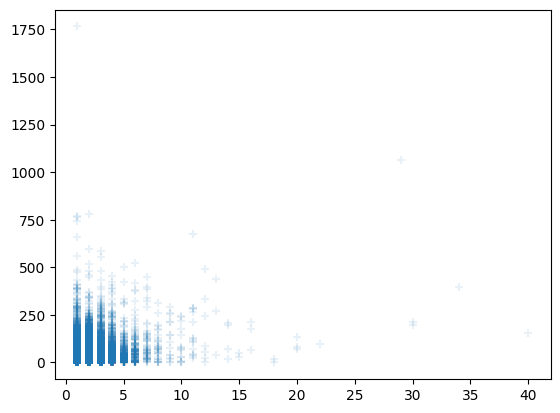

In [5]:
plt.rcParams['scatter.marker'] = '+'
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

Text(0, 0.5, 'frequency')

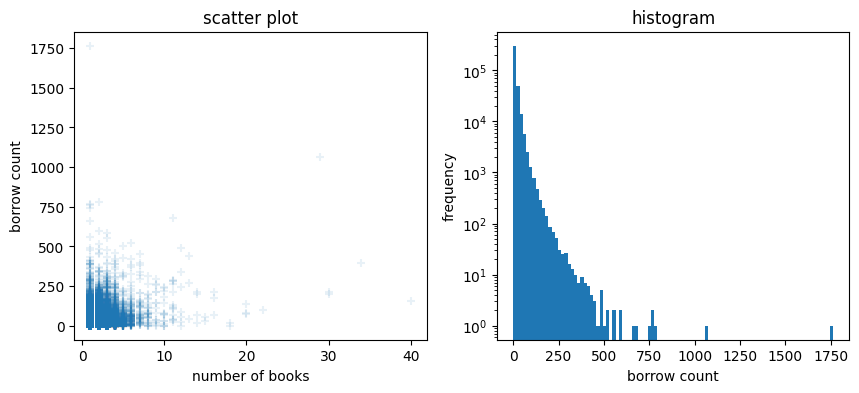

In [7]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].scatter(ns_book7['도서권수'],ns_book7['대출건수'],alpha = 0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books')
axs[0].set_ylabel('borrow count')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

In [8]:
#연도별 발행도서 개수 구하기
count_by_year = ns_book7['발행년도'].value_counts().sort_index()
count_by_year = count_by_year[count_by_year.index <= 2030]

In [9]:
#주제별 도서 개수 구하기
import numpy as np

def kdc_1st_char(no):
    if no is np.nan:
        return '-1'
    else:
        return no[0]
    
count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()


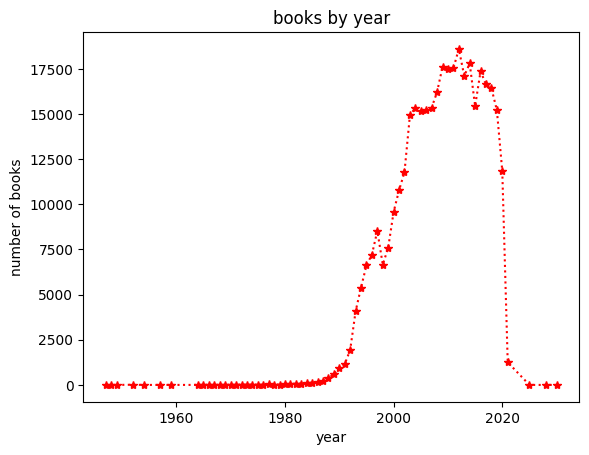

In [10]:
plt.plot(count_by_year,marker = '*', linestyle = ':', color = 'red')
plt.title('books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

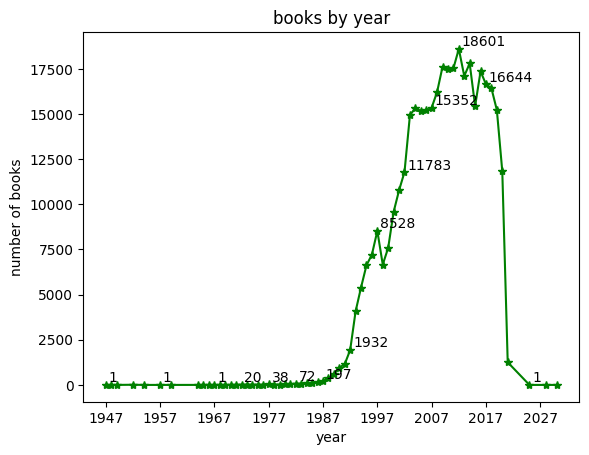

In [11]:
plt.plot(count_by_year,marker = '*', linestyle = '-', color = 'green')
plt.title('books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(2,2), textcoords='offset points')
plt.show()

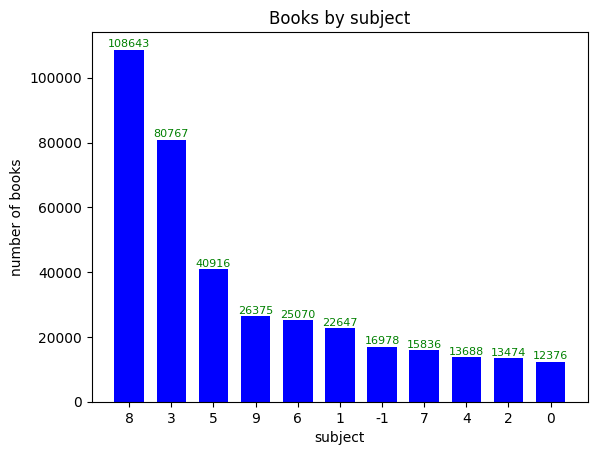

In [14]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx,val), xytext=(0,2), textcoords='offset points', fontsize=8, ha='center', color='green')
plt.show()

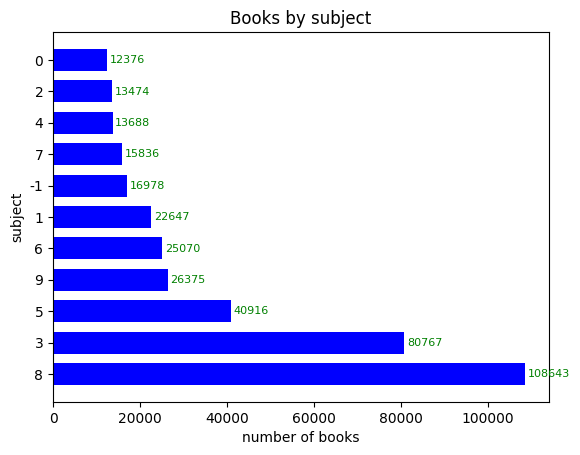

In [18]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2,0), textcoords='offset points', fontsize=8, va='center', color='green')
plt.show()